In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('F:/Data/Titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
for column in data.select_dtypes(include=['object']).columns:
    data[column], unique = pd.factorize(data[column])

data.fillna(data.mean(), inplace=True)

In [16]:
X = data[['Age', 'Fare', 'Pclass', 'Sex', 'Embarked']].values
y = data['Survived']
X

array([[22.        ,  7.25      ,  3.        ,  0.        ,  0.        ],
       [38.        , 71.2833    ,  1.        ,  1.        ,  1.        ],
       [26.        ,  7.925     ,  3.        ,  1.        ,  0.        ],
       ...,
       [29.69911765, 23.45      ,  3.        ,  1.        ,  0.        ],
       [26.        , 30.        ,  1.        ,  0.        ,  1.        ],
       [32.        ,  7.75      ,  3.        ,  0.        ,  2.        ]])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


Text(0, 0.5, 'age')

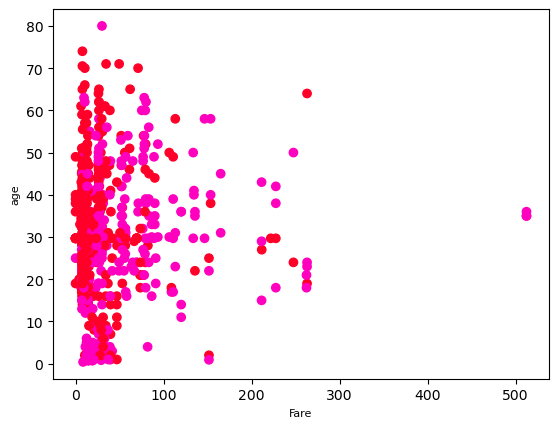

In [34]:
plt.scatter(X[:, 1], X[:, 0], c=y, cmap='gist_rainbow')
plt.xlabel('Fare', fontsize = 8)
plt.ylabel('age', fontsize = 8)

In [34]:
km = KMeans(n_clusters = 2, random_state = 42)
km.fit(X)

F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
F:\bsuir\python_problem\Anaconda\anotherone\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [36]:
centers = km.cluster_centers_
print(centers)

[[2.21802299e+02 2.34022989e+00 3.88505747e-01 2.87668350e+01
  6.29885057e-01 4.34482759e-01 1.61009195e+02 3.32633899e+01
  6.48045977e+00 3.77011494e-01]
 [6.59872807e+02 2.27850877e+00 3.17982456e-01 3.05884662e+01
  4.21052632e-01 3.31140351e-01 4.45993421e+02 3.11938042e+01
  2.22039474e+01 3.42105263e-01]]


In [10]:
k = 2

In [17]:
np.random.seed(0)
centors_id = np.random.choice(X.shape[0], k, replace = False)
centors_id

array([495, 648])

In [18]:
centroids = X[centors_id]
centroids

array([[29.69911765, 14.4583    ,  3.        ,  0.        ,  1.        ],
       [29.69911765,  7.55      ,  3.        ,  0.        ,  0.        ]])

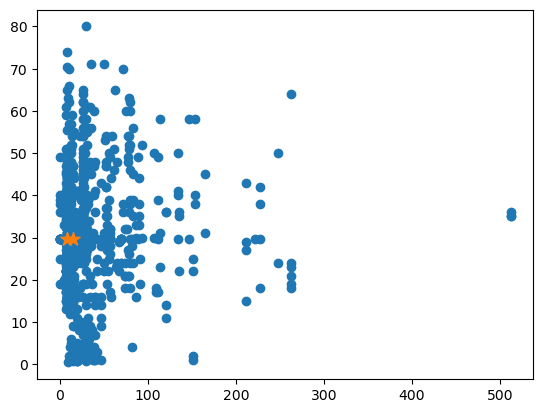

In [47]:
plt.figure
plt.scatter(X[:, 1], X[:, 0])
plt.scatter(centroids[:, 1], centroids[:, 0], marker = '*', s =100)

In [22]:
colors = ['green', 'red']

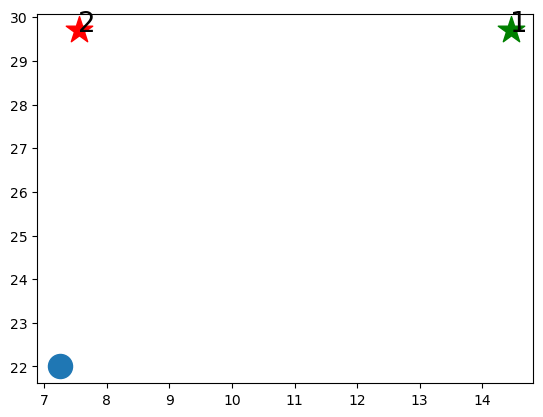

In [36]:
idx_1 = 0
plt.figure
plt.scatter(X[idx_1, 1], X[idx_1, 0], s = 300)
for i, centr in enumerate(centroids):
    plt.scatter(centr[1], centr[0], marker = '*', s = 400, c = colors[i])
    plt.text(centr[1] - 0.01, centr[0]- 0.02, f'{i + 1}', fontsize = 20)
    

In [37]:
np.linalg.norm(centroids - X[idx_1], axis = 1)

array([10.5941494 ,  7.70496026])

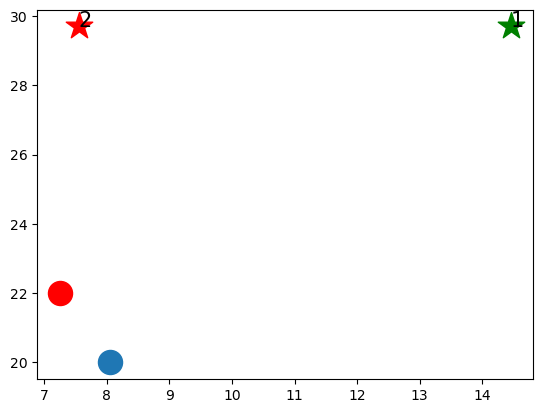

In [41]:
idx_2 = 12
plt.figure
plt.scatter(X[idx_1, 1], X[idx_1, 0], s = 300, c = colors[1])
plt.scatter(X[idx_2, 1], X[idx_2, 0], s = 300)
for i, centr in enumerate(centroids):
    plt.scatter(centr[1], centr[0], marker = '*', s = 400, c = colors[i])
    plt.text(centr[1] - 0.01, centr[0]- 0.02, f'{i + 1}', fontsize = 15)

In [39]:
np.linalg.norm(centroids - X[idx_2], axis = 1)

array([11.66787007,  9.71199687])

In [42]:
clusters = {i: [] for i in range(k)}

In [44]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis = 1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([38.    , 71.2833,  1.    ,  1.    ,  1.    ]),
  array([35. , 53.1,  1. ,  1. ,  0. ]),
  array([54.    , 51.8625,  1.    ,  0.    ,  0.    ]),
  array([ 2.   , 21.075,  3.   ,  0.   ,  0.   ]),
  array([27.    , 11.1333,  3.    ,  1.    ,  0.    ]),
  array([14.    , 30.0708,  2.    ,  1.    ,  1.    ]),
  array([ 4. , 16.7,  3. ,  1. ,  0. ]),
  array([58.  , 26.55,  1.  ,  1.  ,  0.  ]),
  array([39.   , 31.275,  3.   ,  0.   ,  0.   ]),
  array([55., 16.,  2.,  1.,  0.]),
  array([ 2.   , 29.125,  3.   ,  0.   ,  2.   ]),
  array([29.69911765, 13.        ,  2.        ,  0.        ,  0.        ]),
  array([31., 18.,  3.,  1.,  0.]),
  array([35., 26.,  2.,  0.,  0.]),
  array([34., 13.,  2.,  0.,  0.]),
  array([28. , 35.5,  1. ,  0. ,  0. ]),
  array([ 8.   , 21.075,  3.   ,  1.   ,  0.   ]),
  array([38.    , 31.3875,  3.    ,  1.    ,  0.    ]),
  array([ 19., 263.,   1.,   0.,   0.]),
  array([40.    , 27.7208,  1.    ,  0.    ,  1.    ]),
  array([ 29.69911765, 146.

In [45]:
len(clusters[0]), len(clusters[1])

(527, 364)

In [50]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis = 0)

new_centroids

{0: array([30.25442516, 49.0992723 ,  1.91081594,  0.45351044,  0.33206831]),
 1: array([28.89514221,  7.7434967 ,  2.88461538,  0.20604396,  0.39835165])}

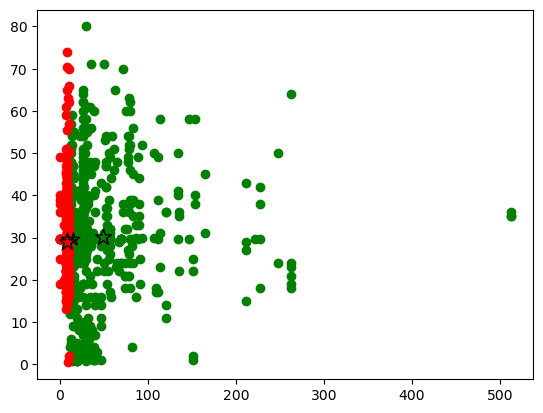

In [55]:
plt.figure
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[1], x[0], c = colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[1], centr[0], marker = '*', c = colors[i], s = 90, edgecolors = 'black')

for i in new_centroids:
    plt.scatter(new_centroids[i][1], new_centroids[i][0], marker = '*', s = 150, c = colors[i], edgecolors = 'black')

In [64]:
from tqdm import tqdm

def KMeans(X, k = 2, num_iter = 4):
    np.random.seed(0)
    centors_idx = np.random.choice(X.shape[0], k, replace = False)
    centroids = X[centors_idx]
    
    for i in tqdm(range(num_iter)):
        clusters = {i: [] for i in range(k)}
        for x in X:
            distances = np.linalg.norm(centroids - x, axis = 1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)
        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis = 0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))
        centroids = new_centroids.copy()

    return centroids, clusters
    

In [65]:
centroids, clusters = KMeans(X)
centroids

100%|██████████| 4/4 [00:00<00:00, 54.39it/s]


array([[ 34.12628496, 125.07967787,   1.17213115,   0.59016393,
          0.46721311],
       [ 28.9967582 ,  17.4697381 ,   2.48894668,   0.31469441,
          0.3420026 ]])

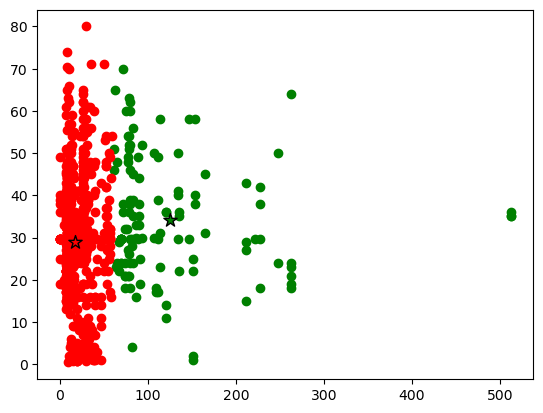

In [67]:
plt.figure
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[1], x[0], c = colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[1], centr[0], marker = '*', c = colors[i], s = 100, edgecolors = 'black')